<a href="https://colab.research.google.com/github/engSalah-dot/Machine-Learning-from-scratch-to-advanced/blob/main/Fashion%20MNIST%20Datasets%20Model%20Using%20CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion MNIST Datasets Model Using CNNs**

In [1]:
import tensorflow as tf
import numpy as np
!pip install -U tensorflow_datasets
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
tfds.disable_progress_bar()
import math


In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
datasets,metadata=tfds.load('fashion_mnist',as_supervised=True,with_info=True)
class_names=metadata.features['label'].names
train_datasets,test_datasets=datasets['train'],datasets['test']


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
x=metadata.splits['train'].num_examples
y=metadata.splits['test'].num_examples
print(x,y)


60000 10000


In [5]:
def Normalize(images,lables):

  images=tf.cast(images,tf.float32)
  images/=255
  return images,lables
train_datasets=train_datasets.map(Normalize)
test_datasets =test_datasets.map(Normalize)
train_datasets=train_datasets.cache()
test_datasets=test_datasets.cache()

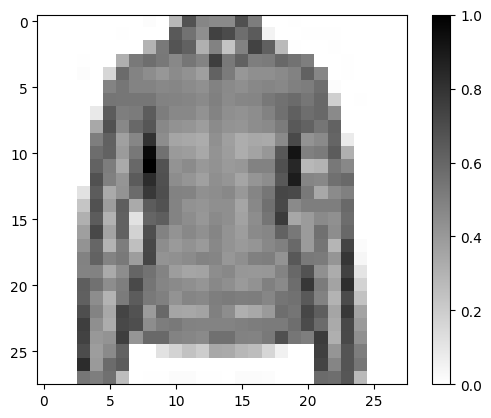

In [6]:
# Take a single image, and remove the color dimension by reshaping
for image,label in test_datasets.take(1):
  break
image=image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


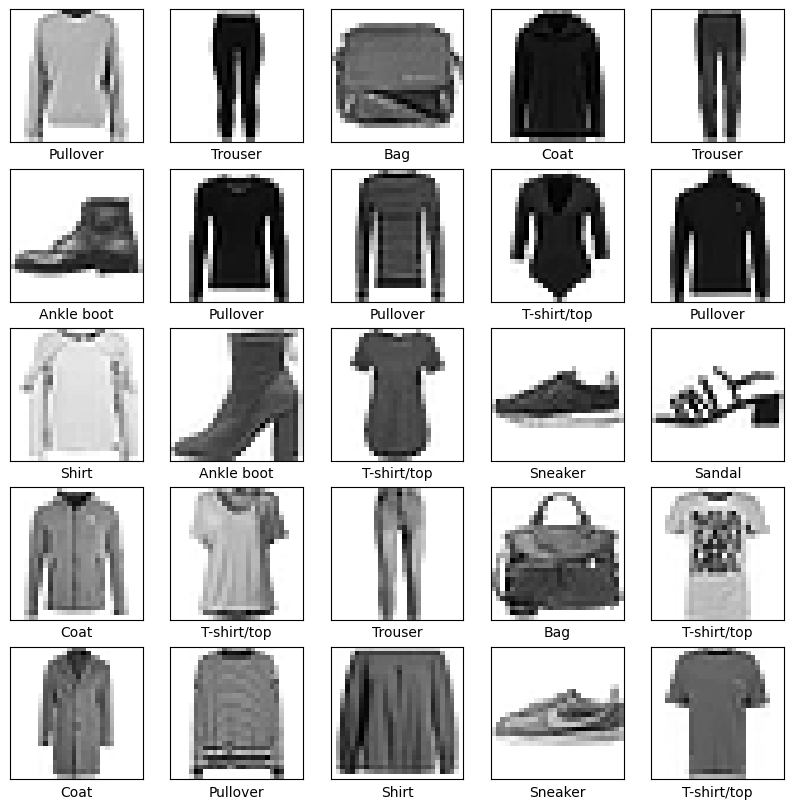

In [7]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_datasets.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

In [8]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
                           tf.keras.layers.MaxPooling2D((2,2),strides=2),
                           tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
                           tf.keras.layers.MaxPooling2D((2,2),strides=2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation=tf.nn.relu),
                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])


In [10]:
Batch_size=32
train_datasets=train_datasets.cache().repeat().shuffle(x).batch(Batch_size)
test_datasets=test_datasets.cache().batch(Batch_size)
#

In [11]:
model.fit(train_datasets,epochs=10,steps_per_epoch=math.ceil(x/Batch_size))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8052 - loss: 0.5429
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9012 - loss: 0.2726
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9201 - loss: 0.2194
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9337 - loss: 0.1779
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9424 - loss: 0.1546
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9509 - loss: 0.1373
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9581 - loss: 0.1108
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9658 - loss: 0.0929
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9706 - loss: 0.0826
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9751 - loss: 0.0683


In [12]:
test_loss, test_accuracy=model.evaluate(test_datasets,steps=math.ceil(y/32))
print('Accuracy on test dataset:',test_accuracy)
print('Loss on test dataset:',test_loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9156 - loss: 0.3139
Accuracy on test dataset: 0.9162999987602234
Loss on test dataset: 0.3230263590812683


In [13]:
for test_image,test_label in test_datasets.take(1):
  test_image=test_image.numpy()
  test_label.numpy()
  prediction=model.predict(test_image)
  print(prediction.shape)
  print(prediction[0])
  print(np.argmax(prediction[0]))
  print(class_names[np.argmax(prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
(32, 10)
[6.1935279e-10 1.1764354e-09 8.6806412e-04 2.2731142e-11 9.8308992e-01
 1.4772152e-11 1.6041983e-02 7.1510853e-13 2.9284474e-13 5.8087124e-10]
4
Coat


In [14]:
def plot_image(i,prediction_array,true_label,img):
  prediction_array,true_label,img=prediction[i],test_label[i],test_image[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0],cmap=plt.cm.binary)
  prdicted_label=np.argmax(prediction_array)
  if prdicted_label==true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[prdicted_label],
                                100*np.max(prediction_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i,prediction_array,true_label):
   prediction_array,true_label=prediction[i],test_label[i]
   plt.grid(False)
   plt.xticks([])
   plt.yticks([])
   thisplot=plt.bar(range(10),prediction_array,color="#777777")
   plt.ylim([0,1])
   prdicted_label=np.argmax(prediction_array)
   thisplot[prdicted_label].set_color('red')
   thisplot[true_label].set_color('blue')




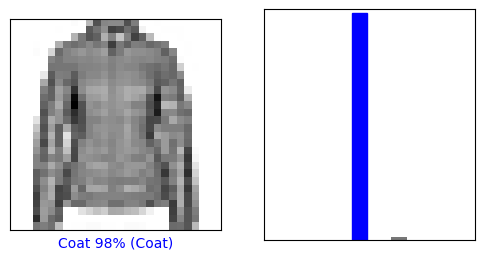

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_label, test_image)
plt.subplot(1,2,2)
plot_value_array(i, prediction, test_label)

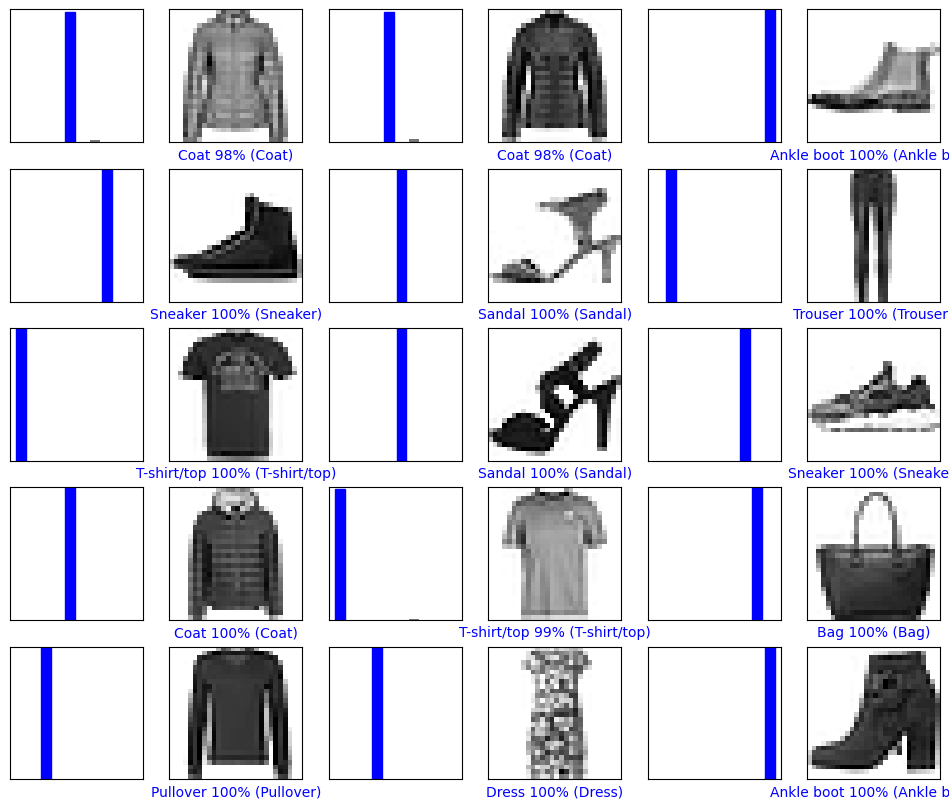

In [16]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_image(i,prediction,test_label,test_image)
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_value_array(i,prediction,test_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
[[6.1935401e-10 1.1764377e-09 8.6806412e-04 2.2731142e-11 9.8308992e-01
  1.4772152e-11 1.6041968e-02 7.1510582e-13 2.9284363e-13 5.8087124e-10]]
Coat


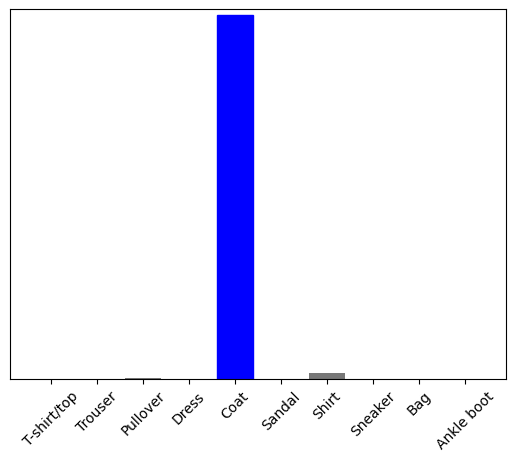

In [17]:
img=test_image[0]

img=np.array([img])
img.shape
pred=model.predict(img)
print(pred)
prediction_label=np.argmax(pred[0])
print(class_names[prediction_label])
plot_value_array(0, pred, test_label)
_ = plt.xticks(range(10), class_names, rotation=45)